## Task 1.1 Summarize the GWAS results


In this first part of the assignement, we are going to load the summary results from a Genome-Wide Association Study (GWAS) and examine its results. In the second part, we examine the mouse homologous gene.

In [38]:
### THE TEXT AND CODE IN THIS FIELD IS PROVIDED TO THE STUDENTS
#
### Read ALL instructions FIRST before you begin your data analysis
#
# We are going to examine the GWAS ouput (i.e. summary statistics) of the 2018 GWAS of Major Depression conducted by the PGC.
# The data belong to this publication: Nat Genet. 2018 May;50(5):668-681. doi: 10.1038/s41588-018-0090-3. PMID:29700475
#
# Download this summary statistics file:
! wget "https://www.dropbox.com/scl/fi/yj3m8d2puymhdzufanhs9/MDD2018_ex23andMe.txt?rlkey=4dl6gdi977dyj6neuwjtdf1xv&st=82vc8u0o&dl=0"  -O MDD_2018_original.tsv

# Download the README file:
! wget "https://www.dropbox.com/scl/fi/0buvztu2sl6xa12vwvwyb/pgc-mdd-2018-readme.pdf?rlkey=r6qdropq18mi5rowplhoagcp8&st=v4i71xip&dl=0" -O MDD_2018_README.pdf

# Read the README file before moving to Task 1.1



--2025-12-11 13:18:45--  https://www.dropbox.com/scl/fi/yj3m8d2puymhdzufanhs9/MDD2018_ex23andMe.txt?rlkey=4dl6gdi977dyj6neuwjtdf1xv&st=82vc8u0o&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.83.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.83.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1dfe9840fe5313bd7c7a10a7e.dl.dropboxusercontent.com/cd/0/inline/C22UBw4DL1kAFyRYf9XZUbzcpogp0akyb57aHiBu0mpqQB9GOxrfCiKoycAd-SLLLa1R0fEDjt4nKXc9NOEzpYCQSQ21LFlt3-4VQ7GGYijQAjzJ-IFNSDuPQdI0dmwuIoU/file# [following]
--2025-12-11 13:18:47--  https://uce1dfe9840fe5313bd7c7a10a7e.dl.dropboxusercontent.com/cd/0/inline/C22UBw4DL1kAFyRYf9XZUbzcpogp0akyb57aHiBu0mpqQB9GOxrfCiKoycAd-SLLLa1R0fEDjt4nKXc9NOEzpYCQSQ21LFlt3-4VQ7GGYijQAjzJ-IFNSDuPQdI0dmwuIoU/file
Resolving uce1dfe9840fe5313bd7c7a10a7e.dl.dropboxusercontent.com (uce1dfe9840fe5313bd7c7a10a7e.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:6018:15::a2

**Q1.1.** Load the **tab** separated file 'MDD_2025_gwas_data.tsv' into a table and **check the content and the format**. Show your code and explain what you are doing and why. [2 points]

Relevant column headers:
 1 CHROM: Chromosome;
 2	POS: Base-pair position (GRCh37);
 3	SNP: SNP Marker ID (rs identifier);
 8	PVAL: P-value;

**Q1.2.** How many SNPs were tested?  [1 point]

**Q1.3.** Find the **most significant SNP**. What is this top SNP's rs identifier? [1 point]

**Q1.4.** Using the NCBI online database, in which gene is SNP rs9479138 located? [0.5 point]

**Q1.5.** Looking further in the NCBI database, in which body tissue or organ is this gene most expressed? Provide a link/url showing how you got to this answer. [0.5 point]

In [39]:
import pandas as pd
df = pd.read_csv('MDD_2018_original.tsv', sep='\t')

/tmp/ipython-input-1174509403.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MDD_2018_original.tsv', sep='\t')


In [40]:
df.info()
print(df.head())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13554550 entries, 0 to 13554549
Data columns (total 19 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CHR           object 
 1   SNP           object 
 2   BP            float64
 3   A1            object 
 4   A2            object 
 5   FRQ_A_59851   float64
 6   FRQ_U_113154  float64
 7   INFO          float64
 8   OR            float64
 9   SE            float64
 10  P             float64
 11  ngt           object 
 12  Direction     object 
 13  HetISqt       float64
 14  HetDf         float64
 15  HetPVa        float64
 16  Nca           float64
 17  Nco           float64
 18  Neff          float64
dtypes: float64(13), object(6)
memory usage: 1.9+ GB
  CHR          SNP           BP A1 A2  FRQ_A_59851  FRQ_U_113154   INFO  \
0   8   rs62513865  101592213.0  T  C      0.07470       0.07330  0.957   
1   8   rs79643588  106973048.0  A  G      0.09200       0.09200  0.999   
2   8   rs17396518  108690829.0  T  G   

(13554550, 19)

Q1.1 I loaded the file with pandas and used the function df = pd.read_csv('MDD_2018_original.tsv', sep='\t'). With sep='\t') I generate seperately tabs for the columns instead with commas. With df.info() and df.head() I get the first 5 rows and overall information about the columns.

In [41]:
print(f"Total SNPs tested: {df['SNP'].nunique()}")

Total SNPs tested: 13554489


Q1.2 Total number of unique SNPs tested is 13554489

In [42]:
snp = df.loc[df['P'].idxmin()]

most_significant_SNP = snp['SNP']
most_significant_SNP_p_value = snp['P']

print(f"Most significant SNP: {most_significant_SNP}")
print(f"p-value: {most_significant_SNP_p_value}")



Most significant SNP: rs76025409
p-value: 2.315e-11


Q1.3 The most signficant SNP is rs76025409 with a p-value of 2.135e-11.

Q1.4 SNP rs9479138 is located in the ESR1 (Estrogen Receptor 1) gene region at Chr6

Q1.5 The ESR1 gene is most expressed based on the RNA of normal human tissues in the uterus and endometrium (HPA) https://www.ncbi.nlm.nih.gov/gene/2099#gene-expression


## Task 1.2 Microarray database
Another gene that has often been associated with Major Depression is **PGBD1**.In the Allen Institute microarray database, search for expression patterns of PGBD1: https://human.brain-map.org/microarray/search.

Download the relevant data for PGB1 (first probe, first row). There are two ways to do this:
1. Select the top row (probe) and download this data. Upload the data into  Colab by clicking on the 'file' icon on the top left corner.
2. Run the code provided below using wget commands (pointing to a dropbox database).

In [43]:
#### This is provided to the students! #######
#downloading data
! wget 'https://www.dropbox.com/scl/fi/th8ykvjnk9rlao0ccp47d/Columns.csv?rlkey=dttm23lamkhugkypb0r5bgaj2&st=1wkbgc7r&dl=0' -O Columns.csv
! wget 'https://www.dropbox.com/scl/fi/xs9g0r3egrxi93hhn9pel/Expression.csv?rlkey=jf47vz3ez0mxeascgjdqjn6rc&st=92e3dfew&dl=0' -O Expression.csv
! wget 'https://www.dropbox.com/scl/fi/j2cn98z1vu5igppx69ayf/Contents.txt?rlkey=ew526p39wpe78os3x46rzglrg&st=wd6jzr40&dl=0' -O Contents.txt

--2025-12-11 13:19:54--  https://www.dropbox.com/scl/fi/th8ykvjnk9rlao0ccp47d/Columns.csv?rlkey=dttm23lamkhugkypb0r5bgaj2&st=1wkbgc7r&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.83.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.83.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9878ffb2f61e98dc37b8034793.dl.dropboxusercontent.com/cd/0/inline/C22cgIrT6EW_KpyIjbuOrz6z91NRqgBeARP07hgX-pyX9EmgeqcJ_DqUgXvKDTnCxgBdX-pZ1ScfWJxwoCcs1HvvRiEe525emsBzz-N8WuQVgHmmgHrr5KSsVnr7ecDj6yM/file# [following]
--2025-12-11 13:19:55--  https://uc9878ffb2f61e98dc37b8034793.dl.dropboxusercontent.com/cd/0/inline/C22cgIrT6EW_KpyIjbuOrz6z91NRqgBeARP07hgX-pyX9EmgeqcJ_DqUgXvKDTnCxgBdX-pZ1ScfWJxwoCcs1HvvRiEe525emsBzz-N8WuQVgHmmgHrr5KSsVnr7ecDj6yM/file
Resolving uc9878ffb2f61e98dc37b8034793.dl.dropboxusercontent.com (uc9878ffb2f61e98dc37b8034793.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:601b:15::a27d:80f
Con

**Read the "Contents.txt" file.**

**Load the Expression.csv file and the Columns.csv file in python.**

**Q1.6**  Format the data of Expression.csv and Columns.csv so that you have a table with 1 column of PGB1 expression values, next to columns with information of regions and subjects (donors). You should have 1 row per brain structure for each subject. (1 point)

**Q1.7** Calculate the mean expression accross participants per brain structure.  In which brain structure does this PGB1 have the highest mean expression? (0.5 point)

**Q1.8**   How many missing values are there for the expression of this gene across all brain regions? And for the brain region with the highest expression? (0.5 point)

**Q1.9**  Does PGBD1 look consistently highly expressed across subjects in this top brain region? For full points, consider patterns of PGBD1 expression across different subjects and brain regions. Use figures and/or statistics to help you decide. (2 points)

**Q1.10**   Looking at a coarser level of analysis, in which (larger) brain structures is PGBD1 most highly expressed? (1 point)

In [44]:
df_col = pd.read_csv('Columns.csv')
df_exp = pd.read_csv('Expression.csv')

df_col.shape
df_exp.shape

(0, 1015)

In [45]:
import pandas as pd
import numpy as np

df_exp_transposed = df_exp.T
df_exp_transposed = df_exp_transposed.reset_index()
df_exp_transposed.columns = ["PGBD1"]
df_exp_transposed = df_exp_transposed.iloc[1:].reset_index(drop=True)

print(df_exp_transposed)
print(df_exp_transposed.shape)

              PGBD1
0            0.0097
1        Unnamed: 2
2        Unnamed: 3
3            0.6954
4           -0.2452
...             ...
1009  Unnamed: 1010
1010        -1.1032
1011        -1.1441
1012  Unnamed: 1013
1013        -2.4934

[1014 rows x 1 columns]
(1014, 1)


In [46]:
df_col["PGBD1"] = df_exp_transposed["PGBD1"]
df_col.head(10)

,donor_id,donor_name,donor_age,donor_color,sample_well,sample_polygon,sample_mri_0,sample_mri_1,sample_mri_2,structure_id,structure_name,structure_abbreviation,structure_color,top_level_structure_id,top_level_structure_name,top_level_structure_abbreviation,top_level_structure_color,PGBD1
0,9861,H0351.2001,24 years,EC891D,154,27255,74,96,29,4053,anterior orbital gyrus,AOrG,E8BF59,4009,frontal lobe,FL,E8CD59,0.0097
1,10021,H0351.2002,39 years,0079C0,-1,-1,-1,-1,-1,4053,anterior orbital gyrus,AOrG,E8BF59,4009,frontal lobe,FL,E8CD59,Unnamed: 2
2,12876,H0351.1009,57 years,509800,-1,-1,-1,-1,-1,4053,anterior orbital gyrus,AOrG,E8BF59,4009,frontal lobe,FL,E8CD59,Unnamed: 3
3,14380,H0351.1012,31 years,960050,126426487,1395862,107,133,38,4053,anterior orbital gyrus,AOrG,E8BF59,4009,frontal lobe,FL,E8CD59,0.6954
4,15496,H0351.1015,49 years,C2C200,127687067,121128826,118,125,43,4053,anterior orbital gyrus,AOrG,E8BF59,4009,frontal lobe,FL,E8CD59,-0.2452
5,15697,H0351.1016,55 years,EB3B00,157773010,155701387,115,123,36,4053,anterior orbital gyrus,AOrG,E8BF59,4009,frontal lobe,FL,E8CD59,-0.6640
6,9861,H0351.2001,24 years,EC891D,859,39232,129,78,81,4078,frontal operculum,fro,E8C159,4009,frontal lobe,FL,E8CD59,0.8034
7,10021,H0351.2002,39 years,0079C0,4668,993106,126,79,57,4078,frontal operculum,fro,E8C159,4009,frontal lobe,FL,E8CD59,0.8606
8,12876,H0351.1009,57 years,509800,11086,1270929,134,99,88,4078,frontal operculum,fro,E8C159,4009,frontal lobe,FL,E8CD59,-0.1173
9,14380,H0351.1012,31 years,960050,126431753,1403264,132,121,68,4078,frontal operculum,fro,E8C159,4009,frontal lobe,FL,E8CD59,0.7415


In [47]:
df_col['PGBD1'] = pd.to_numeric(df_col['PGBD1'], errors='coerce')
print(df_col['PGBD1'].dtype)

float64


In [48]:
mean_expr = df_col.groupby("structure_name")["PGBD1"].mean().sort_values(ascending=False)
print(mean_expr)


structure_name
VIIB                                  1.679878
occipital pole                        1.664000
parolfactory gyri                     1.405160
subcallosal cingulate gyrus           1.225700
crus I                                1.213950
                                        ...   
lateral tuberal nucleus              -1.627975
supraoptic nucleus                   -1.666240
globose nucleus                      -1.694325
paraventricular nuclei of thalamus   -1.748700
perifornical nucleus                 -1.849750
Name: PGBD1, Length: 160, dtype: float64


Q1.7 Highest mean expression is in the VIIB region.

In [49]:
missing_values = df_col['PGBD1'].isnull().sum()
print(f"Number of missing values: {missing_values}")

missing_values_VVIB = df_col[df_col['structure_name'] == 'VIIB']['PGBD1'].isnull().sum()
print(f"Number of missing values in VVII region: {missing_values_VVIB}")

Number of missing values: 181
Number of missing values in VVII region: 3


Q1.8 The total of missing values for all the regions is 181, for the region with the highest expression (VIIB) 3 values are missing

                count      mean       std     min     max
structure_name                                           
VIIB              9.0  1.679878  2.101992  0.5271  7.2349
IX               10.0  1.202840  0.481776  0.5772  2.2555
VI               10.0  1.056230  0.296225  0.7139  1.7094
VIIIB             9.0  0.998067  0.897504 -0.9764  2.4377
V                10.0  0.989030  0.405194  0.1708  1.6198
X                 7.0  0.831386  0.532515  0.0372  1.4627
IV               10.0  0.765240  0.498501 -0.4356  1.2608
III               8.0  0.723825  0.626207 -0.3408  1.6655
VIIIA            10.0  0.705260  1.007589 -1.8750  1.7185
VIIAt             4.0  0.676125  0.481435 -0.0194  1.0831
VIIAf             3.0  0.395633  1.120869 -0.8641  1.2827


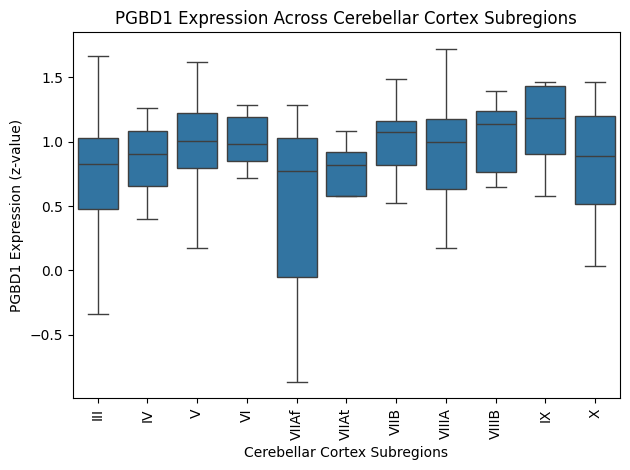

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

PGBD1_expression = df_col[df_col['top_level_structure_name'] == 'cerebellar cortex']['PGBD1']

subregions = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VIIAf', 'VIIAt', 'VIIB', 'VIIIA', 'VIIIB', 'IX', 'X', 'Crus I', 'Crus II']
cerebellar_subregions_df = df_col[df_col['structure_name'].isin(subregions)]
subregion_stats = cerebellar_subregions_df.groupby('structure_name')['PGBD1'].describe()[['count', 'mean', 'std', 'min', 'max']]
subregion_stats_sorted = subregion_stats.sort_values(by='mean', ascending=False)

print(subregion_stats_sorted)


sns.boxplot(x='structure_name', y='PGBD1', data=cerebellar_subregions_df, showcaps=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylabel('PGBD1 Expression (z-value)')
plt.xlabel('Cerebellar Cortex Subregions')
plt.title('PGBD1 Expression Across Cerebellar Cortex Subregions')
plt.tight_layout()
plt.show()

Q1.9 It seems to look consistenly highly expressed in this top brain region. In every brain region, the z-value is positive and lays above 0.5.

In [77]:
region_stats = df_col.groupby('top_level_structure_name')['PGBD1'].describe()
region_stats_sorted = region_stats.sort_values(by='mean', ascending=False)
print(region_stats_sorted[['mean', 'std', 'min', 'max', 'count']])

                              mean       std     min     max  count
top_level_structure_name                                           
cerebellar cortex         0.976863  0.854904 -1.8750  7.2349  105.0
cingulate gyrus           0.736457  0.839637 -0.6055  3.8380   21.0
insula                    0.636427  0.426942 -0.4312  1.0522   11.0
claustrum                 0.632183  0.238582  0.2902  0.9431    6.0
ventral thalamus          0.574833  0.908213 -0.5475  1.7877    6.0
frontal lobe              0.558369  0.627352 -1.1010  4.1906   91.0
temporal lobe             0.540016  0.348163 -0.7534  1.1472   51.0
parietal lobe             0.521769  0.367496 -0.4019  0.9886   32.0
occipital lobe            0.491537  0.532645 -0.9974  1.6640   30.0
subthalamus               0.359967  0.411777 -0.2111  0.7946    6.0
parahippocampal gyrus     0.323017  0.316374 -0.2913  0.5326    6.0
hippocampal formation     0.206072  0.709854 -0.7664  3.0042   36.0
globus pallidus           0.163918  0.784277 -1.

Q1.10 The cerebellar cortex is the average highest expresssed PGBD1 (z-value) brain region with 0.976863 and std of 0.854904 compared to the other top brain regions. However, the cerebellar cortex contains an outlier with a z-value of 7.2349 which makes the average expression higher. Altough the other data points are relatively more close to the average (n = 105). Next follows the cingulate gyrus and insula. In contrast to these regions, the cerebellar cortex contains 105 values which is way more than the other regions which contain 21 and 11 respectively. I think this is not a fair comparisment for the PGBD1 expression patterns.

# Task 2: Mouse phenome database

For this task, you will download and import some files from the Mouse Phenome Database (MPD, https://phenome.jax.org). This is a database containing a large amount of mouse experimental data, where information on several phenotypes/genotypes can be found.

Execute the wget commands to download the following files to the colab session and the pd.read_csv commands to load them into python.

Here is a short description of the file contents.

- measurements.csv (= Description, units, and other metadata attributes for all phenotype measures (traits) in MPD. One row per measure.)
- straininfo.csv (= Strain name, vendor, stock number, web page URL, MPD strain ID, and other attributes for each mouse strain in MPD. One row per strain.)
- strainmeans.csv.gz (= Strain averages, SD, SEM, N, CV for all numeric strain survey phenotype measures in MPD.)
- animaldatapoints.csv.gz (= Individual mouse readings for all strain survey phenotype measures. One row per animal reading.)


**Q2.1** How many different mouse strains are listed in the database? (1pt)

**Q2.2** Several strains are not included in projects (n_proj is `nan`). How many strains were actually used in projects? (1pt)

**Q2.3** Which strain was used in the most projects, give the name and id (1 pt)

**Q2.4** Using the measurements and strainmeans file, look up the experiment with measnum = 29508. Give the description of the experiment and the average results for strain C3HeB/FeJ. (**hint:** You should get two values, one for males and one for females) (1 pts)

**Q2.5** For the experiment above (29508) take the results from BALB/cByJ mice (strainid = 50) in animaldatapoints and perform a two-tailed two-sample t-test for `males > females`. What are the t-value and the p-value? (2 pts)

**Q2.6** Plot a dotplot of the the body weight (measnum = 11201 listed in `measurements`) on the y-axis as a function of strain name on the x axis. Color-code sex. Add sensible title and axis labels. Make the axis legend lisible. (**hint:** strain ID is encoded differently in the tables!!!) (2 pts)

**Q2.7** The project  "Wahlsten1" (projsym = "Wahlsten1" listed in `measurements`) examines anxiety behaviour using two assays (open field test) and elevated plus maze (epm) in 20 strains, and across both sexes. Plot the mean values across strain and sex for measnum =  10831 (percentage of time spent 10 cm from the wall, higher values indicate more anxiety) on the x-axis, and measnum = 10852 (percentage of time spent in open arms vs closed. lower values indicate less anxiety) on the y-axis. Add a regression line to the plot. Add sensible title and axis labels. Make the axis legend lisible. Get a correlation value for the two measurments. (3 pts)


In [51]:
# code to download the data

! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/measurements.csv
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/straininfo.csv
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/strainmeans.csv.gz
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/animaldatapoints.csv.gz

--2025-12-11 13:19:58--  https://phenomedoc.jax.org/MPD_downloads/measurements.csv
Resolving phenomedoc.jax.org (phenomedoc.jax.org)... 34.49.178.191
Connecting to phenomedoc.jax.org (phenomedoc.jax.org)|34.49.178.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1545658 (1.5M) [text/csv]
Saving to: ‘measurements.csv.1’

measurements.csv.1  100%[===================>]   1.47M  --.-KB/s    in 0.02s   

2025-12-11 13:19:58 (84.2 MB/s) - ‘measurements.csv.1’ saved [1545658/1545658]

--2025-12-11 13:19:58--  https://phenomedoc.jax.org/MPD_downloads/straininfo.csv
Resolving phenomedoc.jax.org (phenomedoc.jax.org)... 34.49.178.191
Connecting to phenomedoc.jax.org (phenomedoc.jax.org)|34.49.178.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366018 (357K) [text/csv]
Saving to: ‘straininfo.csv.1’

straininfo.csv.1    100%[===================>] 357.44K  --.-KB/s    in 0.003s  

2025-12-11 13:19:58 (110 MB/s) - ‘straininfo.csv.1’ saved [36

In [52]:
# code to load the data into pandas dataframes
import pandas as pd
measurements = pd.read_csv('measurements.csv')
straininfo = pd.read_csv('straininfo.csv')
strainmeans = pd.read_csv('strainmeans.csv.gz')
animaldatapoints = pd.read_csv('animaldatapoints.csv.gz')

/tmp/ipython-input-3586439961.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  animaldatapoints = pd.read_csv('animaldatapoints.csv.gz')
